In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import csv
import seaborn as sns

In [300]:
df = pd.read_csv('sentiments.csv')
df_topics = pd.read_csv('topics-quant_max.csv', header=0)
df=df.drop('Unnamed: 0.1', axis=1)
df=df.drop('Unnamed: 0', axis=1)

In [301]:
df_topics.head()

,incident parkland (1),incident mass shooting (1),guns ar 15,incident parkland (2),government trump,culture national identity,meta opinions,gun control national identity,meta meta,gun control bans,...,gun control second ammendment (2),gun control nra,guns assault weapons (2),guns sales,culture government,incident mass shooting (2),paper,aid,max_top,general
0,0.042322,0.000000,0.000000,0.015700,0.022909,0.171845,0.006615,0.058820,0.000000,0.010476,...,0.007788,0.060155,0.000000,0.0,0.000000,0.000000,wsj,wsj0,culture national identity,culture
1,0.078540,0.000000,0.012007,0.051582,0.030943,0.162456,0.000000,0.052241,0.000000,0.000000,...,0.000000,0.015661,0.000000,0.0,0.000000,0.000000,wsj,wsj8,culture national identity,culture
2,0.000000,0.000000,0.000000,0.013689,0.026811,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000236,0.009360,0.012419,0.0,0.201927,0.007424,wsj,wsj15,culture government,culture
3,0.010037,0.004265,0.000000,0.047053,0.000000,0.029974,0.012355,0.059780,0.000665,0.043931,...,0.000000,0.000175,0.081062,0.0,0.117267,0.007042,wsj,wsj21,culture government,culture
4,0.000000,0.074249,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.037849,0.0,0.315660,0.000000,wsj,wsj28,culture government,culture


In [302]:
df_sent = df[(df.p_pos >= 0.65) | (df.p_neg >= 0.65)]
df_sent['positive']= np.where(df_sent['p_pos']>=0.65, 1, 0)
df_sent['negative']= np.where(df_sent['p_neg']>=0.65, 1, 0)
df_sent.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,aid,paper,author,date,url,sent,p_pos,p_neg,positive,negative
3,wsj3,wsj,[],NaN,http://www.wsj.com/video/how-student-survivors...,pos,0.976332,0.023668,1,0
4,wsj4,wsj,"['Heather Haddon', 'Google', 'Heather.Haddon W...",NaN,https://www.wsj.com/articles/kroger-to-stop-se...,pos,0.739436,0.260564,1,0
5,wsj5,wsj,"['Jason L. Riley', 'Jason.Riley Wsj.Com']",NaN,https://www.wsj.com/articles/gun-control-misse...,pos,0.999709,0.000291,1,0
6,wsj6,wsj,"['Vanessa Fuhrmans', 'Rachel Feintzeig', 'Vane...",NaN,https://www.wsj.com/articles/ceos-choose-sides...,pos,0.739436,0.260564,1,0
7,wsj7,wsj,"['Jon Kamp', 'Shibani Mahtani', 'Jon.Kamp Wsj....",NaN,https://www.wsj.com/articles/states-consider-l...,pos,0.999902,0.000098,1,0


In [303]:
grp=df_sent.groupby('paper', as_index=False).sum()
grp['neg_ratio'] = (grp['negative']/(grp['positive']+grp['negative']))*100
grp['pos_ratio'] = (grp['positive']/(grp['positive']+grp['negative']))*100
grp.set_index(['paper'])
grp.head()

,paper,p_pos,p_neg,positive,negative,neg_ratio,pos_ratio
0,blaze,304.059131,121.940869,327,99,23.239437,76.760563
1,breitbart,240.548730,95.451270,252,84,25.000000,75.000000
2,fox,251.689687,129.310313,264,117,30.708661,69.291339
3,huffpo,226.523674,70.476326,246,51,17.171717,82.828283
4,inforwars,179.868102,74.131898,184,70,27.559055,72.440945


In [304]:
df_media_ranks = pd.read_csv('trustmatrix.csv', header=0)
df_media_ranks.head()

,paper,trust,polarity,rank,cons_pol,lib_pol
0,wsj,4,1,3,1,-1
1,npr,5,4,1,-4,4
2,msnbc,1,1,0,-1,1
3,blaze,3,4,-1,4,-4
4,nyt,2,3,-1,-3,3


In [305]:
papers = ['Infowars', 'The Blaze', 'Breitbart', 'Fox', 'WSJ', 'MSNBC', 'Huff Post', 'NYT', 'NPR', 'The Nation']
grp_sent_rank = pd.merge(grp, df_media_ranks, on=['paper', 'paper'])
gsr=grp_sent_rank.sort_values('lib_pol')
gsr=gsr.set_index(np.arange(len(gsr.index)))
gsr.head()

,paper,p_pos,p_neg,positive,negative,neg_ratio,pos_ratio,trust,polarity,rank,cons_pol,lib_pol
0,inforwars,179.868102,74.131898,184,70,27.559055,72.440945,-5,5,-10,5,-5
1,blaze,304.059131,121.940869,327,99,23.239437,76.760563,3,4,-1,4,-4
2,breitbart,240.548730,95.451270,252,84,25.000000,75.000000,-2,3,-5,3,-3
3,fox,251.689687,129.310313,264,117,30.708661,69.291339,-1,2,-3,2,-2
4,wsj,252.075525,77.924475,273,57,17.272727,82.727273,4,1,3,1,-1


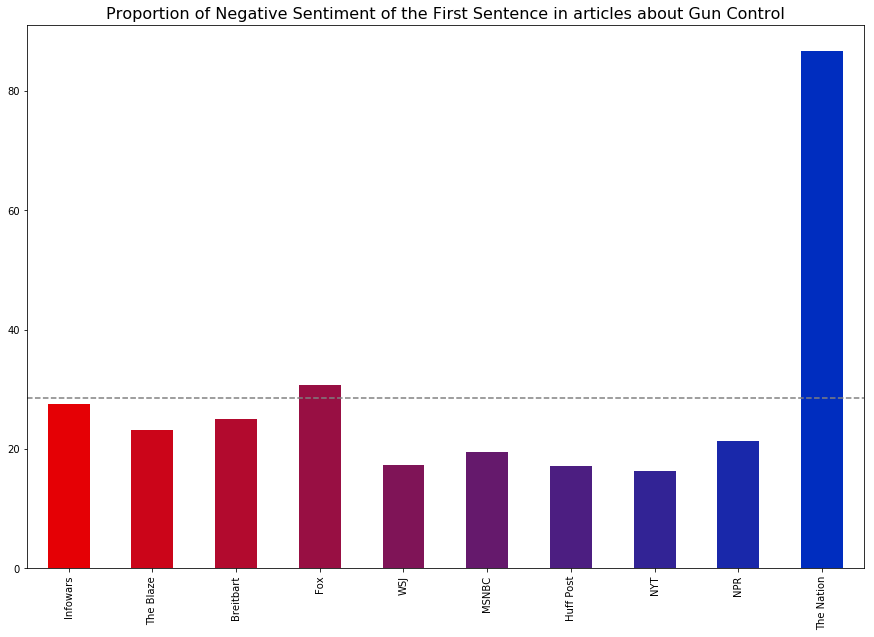

In [313]:
def make_bars(my_series, filename, title):
    s = pd.Series(list(my_series), index = papers)
    mean = my_series.mean()
    plt.figure(figsize=(15,10))
    plt.axhline(mean, color='grey', linestyle='--')
    ax = plt.gca()
    ax.tick_params(axis='x')
    ax.tick_params(axis='y')
    ax.set_title(title+"articles about Gun Control", fontsize=16)
    mycolors = ['#E50005', '#cb0519','#b20a2e', '#980f43', '#7f1457', '#65196c', '#4c1e81', '#322395', '#1928aa', '#002dbf' ]
    s.plot(kind='bar', color=mycolors,)
    plt.savefig(filename+'.svg', dpi=1000)
    plt.savefig(filename+'.png')
    
make_bars(gsr['neg_ratio'], 'avg_sent', "Proportion of Negative Sentiment of the First Sentence in ")

In [307]:
df['subjective'] = np.where((df.p_pos >= 0.65) | (df.p_neg >= 0.65), 1, 0)
total_subj_s = (df.groupby('paper')['subjective'].count())
subjective_s = (df.groupby('paper')['subjective'].sum())
df_subj = (subjective_s / total_subj_s)*100
df_subj

paper
blaze        83.040936
breitbart    77.777778
fox          81.410256
huffpo       66.000000
inforwars    76.506024
msnbc        80.606061
nation       97.142857
npr          80.000000
nyt          75.776398
wsj          73.825503
Name: subjective, dtype: float64

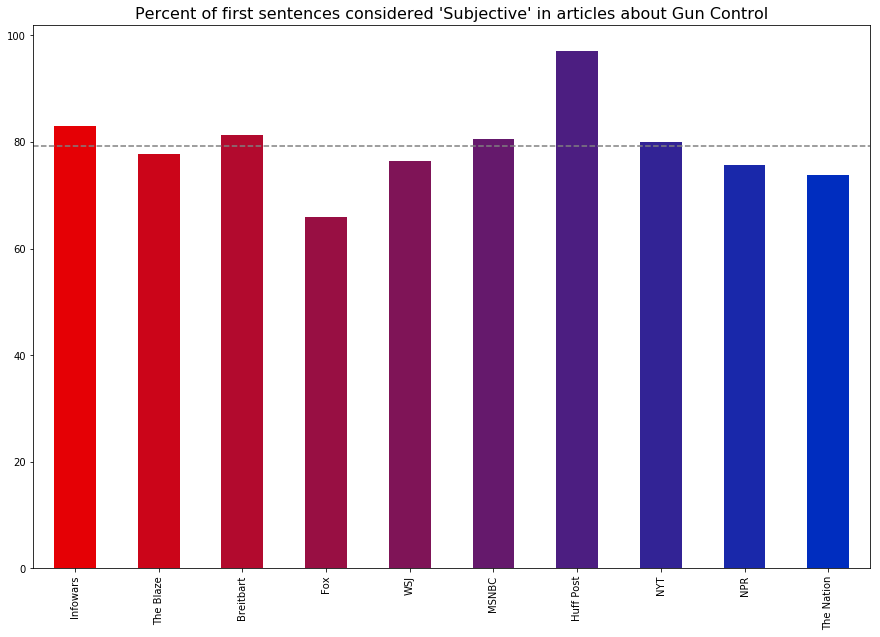

In [308]:
make_bars(df_subj, 'percent_subjective', "Percent of first sentences considered 'Subjective' in ")

In [309]:
df_topics_sent = pd.merge(df, df_topics, on=['aid', 'aid'])
df_topics_sent.head()
df_ts = df.merge(df_topics[['aid','max_top', 'general']], on = 'aid', how='left')
df_ts['negative']= np.where(df_ts['p_neg']>=0.65, 1, 0)
df_ts.head()

,aid,paper,author,date,url,sent,p_pos,p_neg,subjective,max_top,general,negative
0,wsj0,wsj,"['Natalie Andrews', 'Louise Radnofsky', 'Krist...",NaN,https://www.wsj.com/articles/trump-calls-meeti...,pos,0.642044,0.357956,0,culture national identity,culture,0
1,wsj0,wsj,"['Natalie Andrews', 'Louise Radnofsky', 'Krist...",NaN,https://www.wsj.com/articles/trump-calls-meeti...,pos,0.642044,0.357956,0,incident parkland (2),incident,0
2,wsj0,wsj,"['Natalie Andrews', 'Louise Radnofsky', 'Krist...",NaN,https://www.wsj.com/articles/trump-calls-meeti...,pos,0.642044,0.357956,0,meta opinions,meta,0
3,wsj1,wsj,"['Sarah Krouse', 'Sarah.Krouse Wsj.Com']",NaN,https://www.wsj.com/articles/blackrock-goes-pu...,pos,0.508808,0.491192,0,guns sales,guns,0
4,wsj1,wsj,"['Sarah Krouse', 'Sarah.Krouse Wsj.Com']",NaN,https://www.wsj.com/articles/blackrock-goes-pu...,pos,0.508808,0.491192,0,guns assault weapons (1),guns,0


In [310]:
total_ts=df_ts.groupby(['general'])['subjective'].count()
subject_ts=df_ts.groupby(['general'])['subjective'].sum()
ratio_subj_ts = (subject_ts/total_ts)*100
ratio_subj_ts.drop(['meta'], inplace=True)
ratio_subj_ts.head()

general
culture        81.084489
government     78.106509
gun control    77.986348
guns           76.766150
incident       79.074447
Name: subjective, dtype: float64

In [316]:
negative_ts=df_ts.groupby(['general'])['negative'].sum()
ratio_neg_ts = (negative_ts/total_ts)*100
ratio_neg_ts.drop(['meta'], inplace=True)
ratio_neg_ts.sort_values(inplace=True)

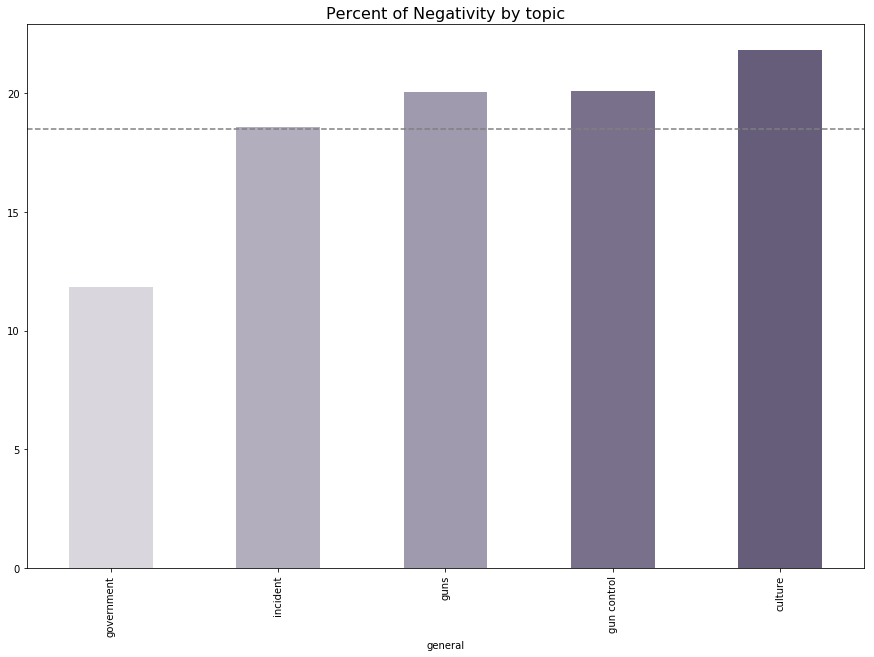

In [318]:
def make_topic_bars(my_series, title, filename):
    mean = my_series.mean()
    plt.figure(figsize=(15,10))
    plt.axhline(mean, color='grey', linestyle='--')
    ax = plt.gca()
    ax.tick_params(axis='x')
    ax.tick_params(axis='y')
    ax.set_title(title, fontsize=16)
    mycolors = ['#d9d6de', '#b3aebd', '#9f9aad', '#79718c', '#665d7b']
    my_series.plot(kind='bar', color = mycolors)
    plt.savefig(filename+'.svg', dpi=1000)
    plt.savefig(filename+'.png')
    
make_topic_bars(ratio_neg_ts, "Percent of Negativity by topic", 'negative_topic')

max_top
culture government                   82.246377
culture national identity            80.464217
government trump                     78.106509
gun control background check         76.485149
gun control bans                     85.135135
gun control legal                    78.832117
gun control national identity        76.785714
gun control nra                      81.250000
gun control second ammendment (1)    74.878049
gun control second ammendment (2)    77.777778
guns ammunition                      78.519856
guns ar 15                           78.688525
guns assault weapons (1)             75.171233
guns assault weapons (2)             70.892019
guns sales                           80.000000
incident mass shooting (1)           76.681614
incident mass shooting (2)           77.222222
incident nyc                         78.901734
incident parkland (2)                82.393398
incident video                       78.851175
meta meta                            81.454545
meta 

In [186]:
df_content = pd.read_csv('cleandataset.csv', header=0, index_col=0)
df_content_fox = df_content[df_content['paper']=='fox']
df_content_fox.head()

,aid,paper,author,date,url,content,clean_content
906,fox0,fox,['Adam Carrington'],2018-03-03 00:00:00,http://www.foxnews.com/opinion/2018/03/03/supr...,The debate about how to deal with guns in our ...,"['debate', 'deal', 'gun', 'country', 'rage', '..."
907,fox1,fox,"['Kaitlyn Schallhorn', '- Jonas Oransky', 'Eve...",2018-03-01 00:00:00,http://www.foxnews.com/politics/2018/03/01/gun...,In the weeks after a gunman walked into a high...,"['week', 'gunman', 'walked', 'high', 'school',..."
908,fox2,fox,['Kathleen Joyce'],2018-03-03 00:00:00,http://www.foxnews.com/us/2018/03/03/cmu-stude...,The 19-year-old student suspected of killing h...,"['19-year-old', 'student', 'suspected', 'killi..."
910,fox4,fox,['Gregg Re'],2018-03-02 00:00:00,http://www.foxnews.com/politics/2018/03/02/tru...,Just one day after putting the NRA on the defe...,"['one', 'day', 'putting', 'nra', 'defensive', ..."
911,fox5,fox,"['Brooke Singman', '- President Trump']",2018-03-01 00:00:00,http://www.foxnews.com/politics/2018/03/01/tru...,President Trump has touched off new tensions w...,"['president', 'trump', 'touched', 'new', 'tens..."
